<a href="https://colab.research.google.com/github/MrSimple07/KMU_application/blob/main/KMU_app_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.6/803.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.6 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from langchain.prompts import PromptTemplate

# tokenizer = AutoTokenizer.from_pretrained("Vikhrmodels/Vikhr-7B-instruct_merged")
# model = AutoModelForCausalLM.from_pretrained("Vikhrmodels/Vikhr-7B-instruct_merged")

# tokenizer = AutoTokenizer.from_pretrained("ai-forever/mGPT")
# model = AutoModelForCausalLM.from_pretrained("ai-forever/mGPT")

# Models

1. Vikhr
2. mGPT

In [ ]:
from transformers import pipeline

#pipe = pipeline("text-generation", model="Vikhrmodels/Vikhr-7B-instruct_merged")

pipe = pipeline("text-generation", model="ai-forever/mGPT")

config.json:   0%|          | 0.00/710 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.64G [00:00<?, ?B/s]

In [ ]:
from langchain.prompts import PromptTemplate

# TODO: add more templates here, including the original one
chegeka_prompt_collection = [
    PromptTemplate(input_variables=["topic", "text"],
                  template='''Вы участвуете в викторине "Что? Где? Когда?". Внимательно прочитайте вопрос из категории \
"{topic}" и ответьте на него. Обратите внимание на формат ответа: если он не указан в вопросе, \
то запишите только слово или фразу, отвечающую на вопрос, никаких дополнительных рассуждений приводить не нужно.
Вопрос: {text}
Ответ: '''), #1
    PromptTemplate(input_variables=["topic", "text"],
                  template= '''Прочитайте вопрос из категории "{topic}" и ответьте на него: {text}
Ответ: '''), #2
    PromptTemplate(input_variables=["topic", "text"],
                   template='''Вы участвуете в викторине "Что? Где? Когда?". Внимательно прочитайте вопрос из категории "{topic}" и ответьте на него. Обратите внимание на формат ответа: если он не указан в вопросе, то запишите только слово или фразу, отвечающую на вопрос, никаких дополнительных рассуждений приводить не нужно.
Вопрос: {text}
Ответ: '''), #3
    PromptTemplate(input_variables=["topic", "text"],
                   template='''Вы участвуете в викторине "Что? Где? Когда?". Прочитайте внимательно вопрос из категории "{topic}" и дайте точный ответ. Вопрос: {text}
Ответ: '''), #4
     PromptTemplate(input_variables=["topic", "text"],
                   template='''Угадайте, в какой категории из "Что? Где? Когда?" относится следующий вопрос: "{text}". Ваш ответ: {topic}
Ответ: ''') #5
#     PromptTemplate(input_variables=["topic", "text"],
#                    template='''Подумайте и дайте точный ответ на вопрос из категории "{topic}": {text}
# Ответ: '''), #6
#      PromptTemplate(input_variables=["topic", "text"],
#                    template='''Ваш вопрос из категории "{topic}": {text}. Внимание, у вас ограниченное время!
# Ответ: '''), #7
#     PromptTemplate(input_variables=["topic", "text"],
#                    template='''Подумайте быстро! Что бы вы ответили на вопрос из категории "{topic}": {text}?
# Ответ: '''), #8
#     PromptTemplate(input_variables=["topic", "text"],
#                    template='''На вас лежит ответственная задача отгадать вопрос из раздела "{topic}": {text}.
# Ответ: '''), #9
#     PromptTemplate(input_variables=["topic", "text"],
#                    template='''Спрятанный вопрос из раздела "{topic}" ждет вашего ответа: {text}
# Ответ: ''') #10
]

In [ ]:
# TODO: create a collection of sampled tasks

chegeka_task_collection = [
    {'text':'Продолжение этого фильма Евгения Матвеева называется', 'topic': 'Любовь'},
    {'text': 'С ЭТИМ ЧЕЛОВЕКОМ, 33-м потомком Нина, Державин сравнивает богатого и ленивого вельможу.', 'topic': 'Гласные - только "А"'},
    {'text': 'По мнению древнего мудреца Рюхейб-бин-Верда: "Мудрость состоит из 10 частей. Одна часть — знания и опыт." А что составляет остальные девять?', 'topic': 'Восток - дело тонкое'},
    {'text': 'По одной из версий, начало названия ЭТОЙ ОРГАНИЗАЦИИ происходит от греческого слова, обозначающего круг.', 'topic': 'Кланы'},
    {'text': 'На девятерной вистуют только эти 2 категории людей', 'topic': 'Нет хода - не вистуй!'},
    {'text': 'Эпиграф к книге "Корпорация М.И.Ф." Асприна звучит так: "Главное — не злоупотреблять...". Чем?', 'topic': 'Миф'},
    {'text': 'Кроме известных исторических полотен, ЕГО кисти принадлежат росписи "первой версии" Храма Христа Спасителя.', 'topic': '-УРИ-.'},
    {'text': 'Именно столько морей омывает берега Италии.', 'topic': 'Италия'},
    {'text': 'Именно ему Эразм Роттердамский посвятил свою книгу "Похвала глупости", а церковь канонизировала его в 1935 году, хотя он и написал книгу о "месте, которого нет".', 'topic': 'ФИЛОСОФИЯ'},
    {'text': 'ЭТОТ ОРЕХ является до такой степени важной частью экспорта Гренады, что даже попал на ее флаг.', 'topic': 'Орехи'}
]

chegeka_collection_answers = [
    {'answer': 'Любовь земная'},
    {'answer': 'Сарданапал'},
    {'answer': 'Молчание'},
    {'answer': 'Ку-клукс-клан (греч. "киклос")'},
    {'answer': 'Попы и студенты (попы от жадности, а студенты — от бедности :-))'},
    {'answer': 'Эпиграфами'},
    {'answer': 'Василий Суриков'},
    {'answer': 'Пять (Ионическое, Тирренское, Лигурийское, Адриатическое и Средиземное)'},
    {'answer': 'Томас Мор ("Утопия")'},
    {'answer': 'Мускатный'}
]

In [ ]:
import pandas as pd

# you should use generation method with temperature, i put pipeline here just for example
def process_texts(prompt_collection, task_collection, pipe, temperature = 0):
    results = []

    for task in task_collection:
        '================ Starting new task ================='
        for prompt in prompt_collection:
            # TODO: save all results to csv dataframe (question, text, prompt, answer)

            generated_text = pipe(prompt.format(**task), return_full_text=False, max_new_tokens=100)[0]['generated_text']
            results.append({'question': task['text'], 'prompt': prompt.format(**task), 'answer': task.get('answer', None), 'generated_text': generated_text})

            df_results = pd.DataFrame(results)
            df_results.to_csv('generated_results.csv', index=False)

            # for instruction models may be special tokens that should be included in the prompt
            print(pipe(prompt.format(**task), return_full_text=False, max_new_tokens=100))


In [ ]:
import pandas as pd

# you should use generation method with temperature, i put pipeline here just for example
def process_texts(prompt_collection, task_collection, pipe):
    results = []

    for task in task_collection:
        '================ Starting new task ================='
        for prompt in prompt_collection:
            # TODO: save all results to csv dataframe (question, text, prompt, answer)

            generated_text = pipe(prompt.format(**task), return_full_text=False, max_new_tokens=100)[0]['generated_text']
            results.append({'question': task['text'], 'prompt': prompt.format(**task), 'answer': task.get('answer', None), 'generated_text': generated_text})

            df_results = pd.DataFrame(results)
            df_results.to_csv('generated_results.csv', index=False)

            # for instruction models may be special tokens that should be included in the prompt
            print(pipe(prompt.format(**task), return_full_text=False, max_new_tokens=100))

In [ ]:
process_texts(chegeka_prompt_collection, chegeka_task_collection, pipe)

[{'generated_text': '________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________'}]
[{'generated_text': '________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________'}]
[{'generated_text': '_________________________________________________________________________________________________________________________________

# TinyLlama

In [ ]:
from transformers import pipeline
pipe = pipeline("text-generation", model="TinyLlama/TinyLlama-1.1B-Chat-v1.0")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

In [ ]:
process_texts(chegeka_prompt_collection, chegeka_task_collection, pipe)

[{'generated_text': '\n\n"Что? Где? Когда?"\n\nВнимательно прочитайте ответ отвечающего на вопрос.\n\nВопрос: Как вы понимаете, что происходит в фильме Евгения Матвеева "Что? Где? Когда?"\nОтвет: \n\n"Любовь"\n\nВнимательно прочитайте ответ отвечающего на вопрос'}]
[{'generated_text': '\n\nДа, продолжение этого фильма Евгения Матвеева называется "Долгие годы".'}]
[{'generated_text': '\n\n"Что? Где? Когда?"\n\nВнимательно прочитайте ответ отвечающего на вопрос.\n\nВопрос: Как вы понимаете, что происходит в фильме Евгения Матвеева "Что? Где? Когда?"\nОтвет: \n\n"Любовь"\n\nВнимательно прочитайте ответ отвечающего на вопрос'}]
[{'generated_text': '1. "Что? Где? Когда?"\n2. "Когда?"\n3. "Когда?"\n4. "Когда?"\n5. "Когда?"\n6. "Когда?"\n7. "Когда?"\n8. "Когда?"\n9. "Когда?"\n10. "Когда?"\n11. "Когда?"\n12. "Когда?"\n13. "Когда?"'}]
[{'generated_text': '1. Любовь\n\n2. Любовь\n\n3. Любовь\n\n4. Любовь\n\n5. Любовь\n\n6. Любовь\n\n7. Любовь\n\n8. Любовь\n\n9. Любовь\n\n10. Любовь\n\n11. Любовь

In [ ]:
import pandas as pd

df_results = pd.read_csv('generated_results_tinyLlama.csv')

questions = [task['text'] for task in chegeka_task_collection for _ in range(len(df_results) // len(chegeka_task_collection))]

df_results['question'] = questions
df_results['answer'] = [answer['answer'] for answer in chegeka_collection_answers for _ in range(len(df_results) // len(chegeka_collection_answers))]

df_results.head(10)


,question,prompt,answer,generated_text
0,Продолжение этого фильма Евгения Матвеева назы...,"Вы участвуете в викторине ""Что? Где? Когда?"". ...",Любовь земная,"\n\n""Что? Где? Когда?""\n\nВнимательно прочитай..."
1,Продолжение этого фильма Евгения Матвеева назы...,"Прочитайте вопрос из категории ""Любовь"" и отве...",Любовь земная,"\n\nДа, продолжение этого фильма Евгения Матве..."
2,Продолжение этого фильма Евгения Матвеева назы...,"Вы участвуете в викторине ""Что? Где? Когда?"". ...",Любовь земная,"\n\n""Что? Где? Когда?""\n\nВнимательно прочитай..."
3,Продолжение этого фильма Евгения Матвеева назы...,"Вы участвуете в викторине ""Что? Где? Когда?"". ...",Любовь земная,"1. ""Что? Где? Когда?""\n2. ""Когда?""\n3. ""Когда?..."
4,Продолжение этого фильма Евгения Матвеева назы...,"Угадайте, в какой категории из ""Что? Где? Когд...",Любовь земная,1. Любовь\n\n2. Любовь\n\n3. Любовь\n\n4. Любо...
5,"С ЭТИМ ЧЕЛОВЕКОМ, 33-м потомком Нина, Державин...","Вы участвуете в викторине ""Что? Где? Когда?"". ...",Сарданапал,"1. Богатый вельмож, 2. Ленивый вельмож.\nВопро..."
6,"С ЭТИМ ЧЕЛОВЕКОМ, 33-м потомком Нина, Державин...","Прочитайте вопрос из категории ""Гласные - толь...",Сарданапал,"33-м потомком Нины, Державина сравнивает богат..."
7,"С ЭТИМ ЧЕЛОВЕКОМ, 33-м потомком Нина, Державин...","Вы участвуете в викторине ""Что? Где? Когда?"". ...",Сарданапал,"1. Богатый вельмож, 2. Ленивый вельмож.\nВопро..."
8,"С ЭТИМ ЧЕЛОВЕКОМ, 33-м потомком Нина, Державин...","Вы участвуете в викторине ""Что? Где? Когда?"". ...",Сарданапал,33-м потомком Нины Державина.
9,"С ЭТИМ ЧЕЛОВЕКОМ, 33-м потомком Нина, Державин...","Угадайте, в какой категории из ""Что? Где? Когд...",Сарданапал,33-м потомком Нины Державина является богатый ...


In [ ]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from transformers.data.metrics.squad_metrics import compute_f1, compute_exact
from nltk.tokenize import word_tokenize

def metric_max_over_ground_truths(metric_fn, prediction, ground_truths):
    """Compute max metric between prediction and each ground truth."""
    scores_for_ground_truths = []
    for ground_truth in ground_truths:
        score = metric_fn(prediction, ground_truth)
        scores_for_ground_truths.append(score)
    return max(scores_for_ground_truths)

def process_results(df_results):
    df_results['answer'] = df_results['answer'].astype(str)
    df_results['generated_answer'] = df_results['generated_text'].astype(str)

    df_results['answer'] = df_results['answer'].str.lower()
    df_results['generated_answer'] = df_results['generated_answer'].str.lower()

    df_results['answer_tokens'] = df_results['answer'].apply(word_tokenize)
    df_results['generated_answer_tokens'] = df_results['generated_answer'].apply(word_tokenize)

    max_len = max(df_results['answer_tokens'].apply(len).max(), df_results['generated_answer_tokens'].apply(len).max())

    df_results['answer_tokens'] = df_results['answer_tokens'].apply(lambda x: x + [''] * (max_len - len(x)))
    df_results['generated_answer_tokens'] = df_results['generated_answer_tokens'].apply(lambda x: x + [''] * (max_len - len(x)))


    def calculate_f1(row):
        pred = ' '.join(row['generated_answer_tokens'])
        gold_label_set = [' '.join(row['answer_tokens'])]
        return metric_max_over_ground_truths(compute_f1, pred, gold_label_set)

    def calculate_exact_match(row):
        pred = ' '.join(row['generated_answer_tokens'])
        gold_label_set = [' '.join(row['answer_tokens'])]
        return metric_max_over_ground_truths(compute_exact, pred, gold_label_set)

    # Apply F1 and Exact Match score calculation to DataFrame rows
    df_results['f1_score'] = df_results.apply(calculate_f1, axis=1)
    df_results['exact_match'] = df_results.apply(calculate_exact_match, axis=1)

    return df_results

# Example usage:
processed_results = process_results(df_results)
print(processed_results[['f1_score', 'exact_match']])


    f1_score  exact_match
0   0.062500            0
1   0.000000            0
2   0.062500            0
3   0.000000            0
4   0.066667            0
5   0.000000            0
6   0.000000            0
7   0.000000            0
8   0.000000            0
9   0.000000            0
10  0.000000            0
11  0.000000            0
12  0.000000            0
13  0.000000            0
14  0.000000            0
15  0.000000            0
16  0.000000            0
17  0.000000            0
18  0.000000            0
19  0.000000            0
20  0.000000            0
21  0.038462            0
22  0.000000            0
23  0.000000            0
24  0.000000            0
25  0.000000            0
26  0.000000            0
27  0.000000            0
28  0.000000            0
29  0.000000            0
30  0.000000            0
31  0.000000            0
32  0.000000            0
33  0.000000            0
34  0.000000            0
35  0.000000            0
36  0.000000            0
37  0.000000

In [ ]:
print(df_results['f1_score'].mean())

0.004602564102564103


In [ ]:
df_results.head()

,question,prompt,answer,generated_text,generated_answer,answer_tokens,generated_answer_tokens,f1_score,exact_match
0,Продолжение этого фильма Евгения Матвеева назы...,"Вы участвуете в викторине ""Что? Где? Когда?"". ...",любовь земная,"\n\n""Что? Где? Когда?""\n\nВнимательно прочитай...","\n\n""что? где? когда?""\n\nвнимательно прочитай...","[любовь, земная, , , , , , , , , , , , , , , ,...","['', что, ?, где, ?, когда, ?, '', внимательно...",0.062500,0
1,Продолжение этого фильма Евгения Матвеева назы...,"Прочитайте вопрос из категории ""Любовь"" и отве...",любовь земная,"\n\nДа, продолжение этого фильма Евгения Матве...","\n\nда, продолжение этого фильма евгения матве...","[любовь, земная, , , , , , , , , , , , , , , ,...","[да, ,, продолжение, этого, фильма, евгения, м...",0.000000,0
2,Продолжение этого фильма Евгения Матвеева назы...,"Вы участвуете в викторине ""Что? Где? Когда?"". ...",любовь земная,"\n\n""Что? Где? Когда?""\n\nВнимательно прочитай...","\n\n""что? где? когда?""\n\nвнимательно прочитай...","[любовь, земная, , , , , , , , , , , , , , , ,...","['', что, ?, где, ?, когда, ?, '', внимательно...",0.062500,0
3,Продолжение этого фильма Евгения Матвеева назы...,"Вы участвуете в викторине ""Что? Где? Когда?"". ...",любовь земная,"1. ""Что? Где? Когда?""\n2. ""Когда?""\n3. ""Когда?...","1. ""что? где? когда?""\n2. ""когда?""\n3. ""когда?...","[любовь, земная, , , , , , , , , , , , , , , ,...","[1, ., ``, что, ?, где, ?, когда, ?, '', 2, .,...",0.000000,0
4,Продолжение этого фильма Евгения Матвеева назы...,"Угадайте, в какой категории из ""Что? Где? Когд...",любовь земная,1. Любовь\n\n2. Любовь\n\n3. Любовь\n\n4. Любо...,1. любовь\n\n2. любовь\n\n3. любовь\n\n4. любо...,"[любовь, земная, , , , , , , , , , , , , , , ,...","[1., любовь, 2., любовь, 3., любовь, 4., любов...",0.066667,0


In [ ]:
df_results = pd.read_csv('/content/df_results.csv')

In [ ]:
df_results['answer_tokens'] = df_results['answer'].apply(word_tokenize)
df_results['generated_answer_tokens'] = df_results['generated_answer'].apply(word_tokenize)

df_results['answer_tokens'] = df_results['answer_tokens'].apply(lambda x: [token for token in x if token.strip()])
df_results['generated_answer_tokens'] = df_results['generated_answer_tokens'].apply(lambda x: [token for token in x if token.strip()])

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

prompt_strings = df_results['prompt'].apply(''.join)
answer_strings = df_results['answer_tokens'].apply(' '.join)
generated_answer_strings = df_results['generated_answer_tokens'].apply(' '.join)

combined_text = pd.concat([prompt_strings,answer_strings, generated_answer_strings])

vectorizer = TfidfVectorizer()
combined_vectorizer = vectorizer.fit_transform(combined_text)

cosine_similarity_prompt_generated = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
cosine_similarity_prompt_answer = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[2:3])

print("Cosine similarity between prompt and generated answer:", cosine_similarity_prompt_generated[0][0])
print("Cosine similarity between prompt and answer:", cosine_similarity_prompt_answer[0][0])

Cosine similarity between prompt and generated answer: 0.16944928273923718
Cosine similarity between prompt and answer: 0.9999999999999997


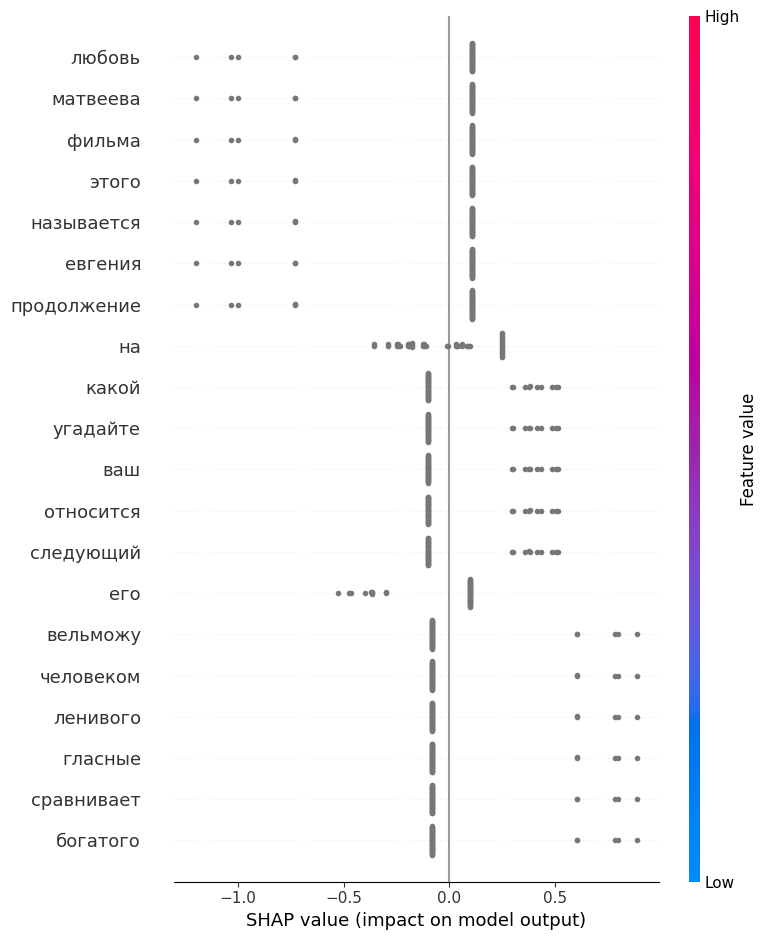

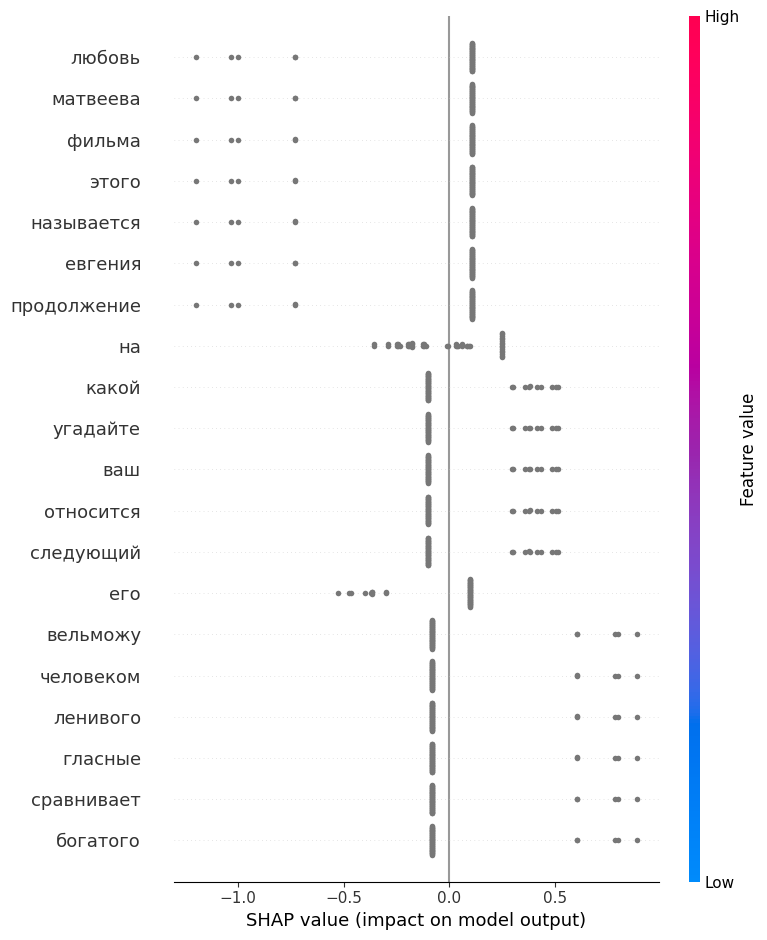

In [10]:
# 3. take LIME (or other method for interpreting the dependence of the answer on input) and analyze why answers are different

import pandas as pd
import numpy as np
import shap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/generated_results_tinyLlama.csv')
instances_to_explain = df['generated_text']

df['answer'] = df['generated_text'].str.replace('Ответ: ', '', regex=False)

label_encoder = LabelEncoder()
df['encoded_answer'] = label_encoder.fit_transform(df['answer'])

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['prompt'])
y = df['encoded_answer']

model = Ridge(alpha=1.0)
model.fit(X, y)

explainer = shap.Explainer(model, X)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, feature_names=vectorizer.get_feature_names_out())

# Chegeka - Vikhr

In [19]:
# 2. measure answer variability (metric(s) is up to you to propose) for a task depending on a prompt

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('/content/generated_results_Vikhr_7B.csv')

def calculate_stability_coefficients(df):
    text_data = df['prompt'] + ' ' + df['generated_text']

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

    cos_similarities = cosine_similarity(tfidf_matrix)

    avg_cos_similarities = cos_similarities.mean(axis=1)

    return avg_cos_similarities

stability_coefficients = calculate_stability_coefficients(df)

df['stability_coefficient'] = stability_coefficients

print(df)
print(df['stability_coefficient'].mean())


                                              question  ... stability_coefficient
0    Буратино заказал три корочки хлеба именно в эт...  ...              0.091105
1    Буратино заказал три корочки хлеба именно в эт...  ...              0.117614
2    Буратино заказал три корочки хлеба именно в эт...  ...              0.031069
3    Буратино заказал три корочки хлеба именно в эт...  ...              0.047115
4    Буратино заказал три корочки хлеба именно в эт...  ...              0.067753
..                                                 ...  ...                   ...
595  ОНА дебютировала в ленте Луиса Бунюэля "Этот с...  ...              0.109059
596  ОНА дебютировала в ленте Луиса Бунюэля "Этот с...  ...              0.037758
597  ОНА дебютировала в ленте Луиса Бунюэля "Этот с...  ...              0.058988
598  ОНА дебютировала в ленте Луиса Бунюэля "Этот с...  ...              0.088802
599  ОНА дебютировала в ленте Луиса Бунюэля "Этот с...  ...              0.028705

[600 rows x 5 c

In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.5 MB/s eta 0:00:00


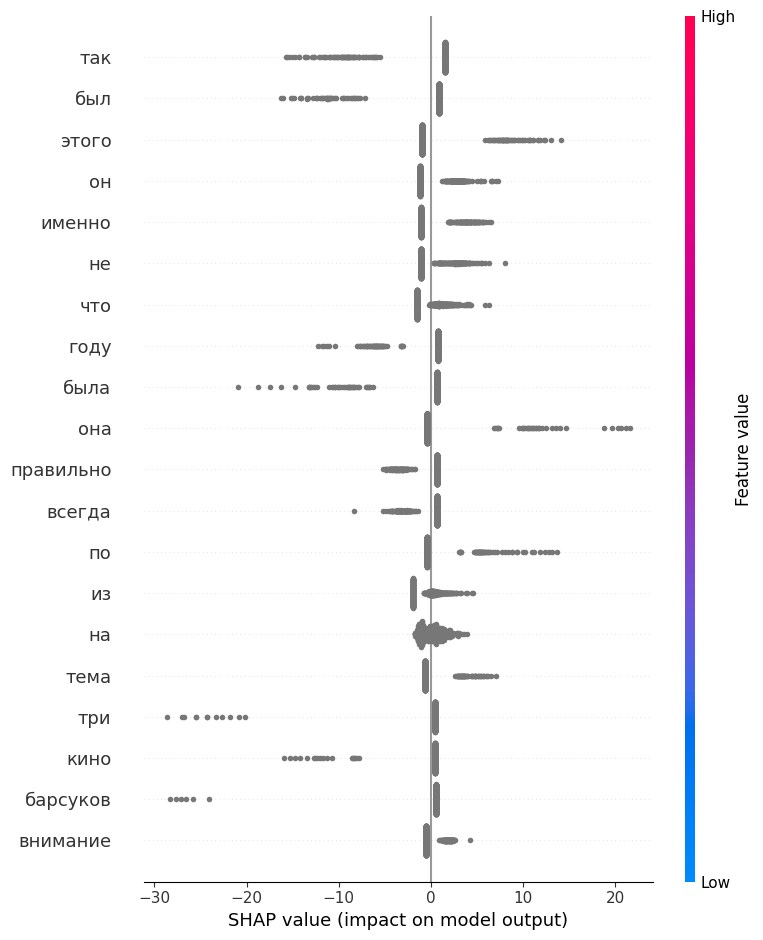

In [9]:
# 3. take LIME (or other method for interpreting the dependence of the answer on input) and analyze why answers are different

import pandas as pd
import numpy as np
import shap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/generated_results_Vikhr_7B.csv')
instances_to_explain = df['generated_text']

df['answer'] = df['generated_text'].str.replace('Ответ: ', '', regex=False)

label_encoder = LabelEncoder()
df['encoded_answer'] = label_encoder.fit_transform(df['answer'])

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['prompt'])
y = df['encoded_answer']

model = Ridge(alpha=1.0)
model.fit(X, y)

explainer = shap.Explainer(model, X)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, feature_names=vectorizer.get_feature_names_out())
